<a href="https://colab.research.google.com/github/Bohdan-Salamakha/study/blob/master/anu/data_science/Data_Pre_processing_and_Visualisation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identify and describe the data quality issues you observe in the dataset.
# Refer to slide 14 of the lecture note.

In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Link to the raw CSV file
file_url = 'https://raw.githubusercontent.com/Bohdan-Salamakha/study/refs/heads/master/anu/data_science/Data%20Assignment%203.csv'

# Loading a file into a DataFrame
data = pd.read_csv(file_url)

In [226]:
# Checking the first rows of data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-14 0:00,313000.0,3.0,1.00,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-14 0:00,2384000.0,3.0,2.25,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-14 0:00,342000.0,2.0,1.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-14 0:00,420000.0,4.0,3.00,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,US
4,02-05-14 0:00,550000.0,3.0,2.00,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,U.S.A.


In [227]:
# Check for missing values
missing_values = data.isnull().sum()
print("Number of missing values ​​in each column:")
print(missing_values)

Number of missing values ​​in each column:
date             0
price            0
bedrooms         3
bathrooms        3
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [228]:
# Unique values ​​in 'country' column to detect inconsistency
unique_countries = data['country'].unique()
print("\nUnique values ​​in column 'country':")
print(unique_countries)


Unique values ​​in column 'country':
['USA' 'US' 'U.S.A.' 'UA']


In [229]:
# Checking data types
data_types = data.dtypes
print("\nColumn data types:")
print(data_types)


Column data types:
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


#Implement several pre-processing operations or tasks based on your decision above on your dataset to improve its quality.
# Refer to slides 16-19 of the lecture note

In [230]:
# Delete records where the price is 0
data = data.loc[data['price'] != 0].copy()

In [231]:
# Calculation of the first and third quartiles and IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining boundaries for removing outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering data, removing outliers
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [232]:
# Filling missing values ​​with median for numeric columns
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)

In [233]:
# Normalize categorical data in the 'country' column
data['country'] = data['country'].replace({'US': 'USA', 'U.S.A.': 'USA', 'UA': 'USA'})


In [234]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%y %H:%M')


In [235]:
# Checking the first rows of data after preprocessing
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.0,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02,342000.0,2.0,1.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,4.0,3.0,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,3.0,2.0,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02,490000.0,4.0,4.5,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


# Visualise the distribution of the most important variables (e.g. prices, cities, countries, number of rooms), that describe the specificity of the sample. Use Descriptive Statistic approaches to do it.

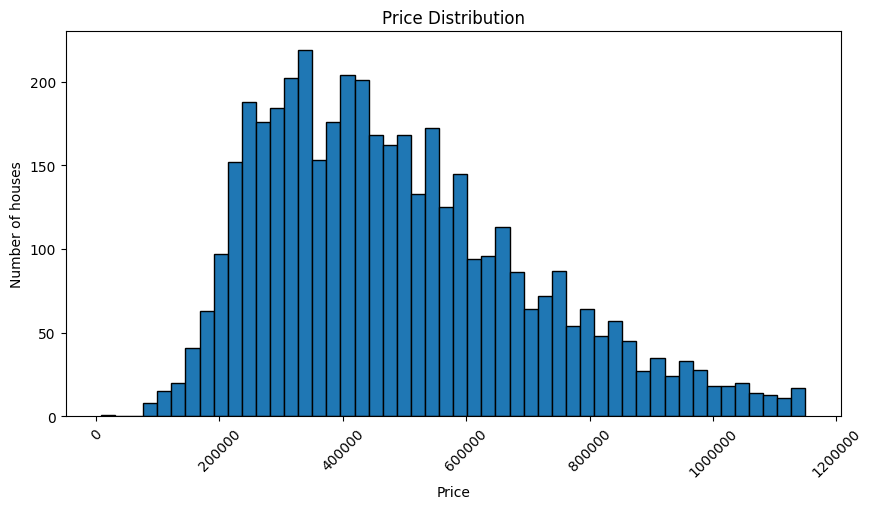

In [236]:
# 1. Histogram for price distribution
plt.figure(figsize=(10, 5))
plt.hist(data['price'], bins=50, edgecolor='k')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.show()

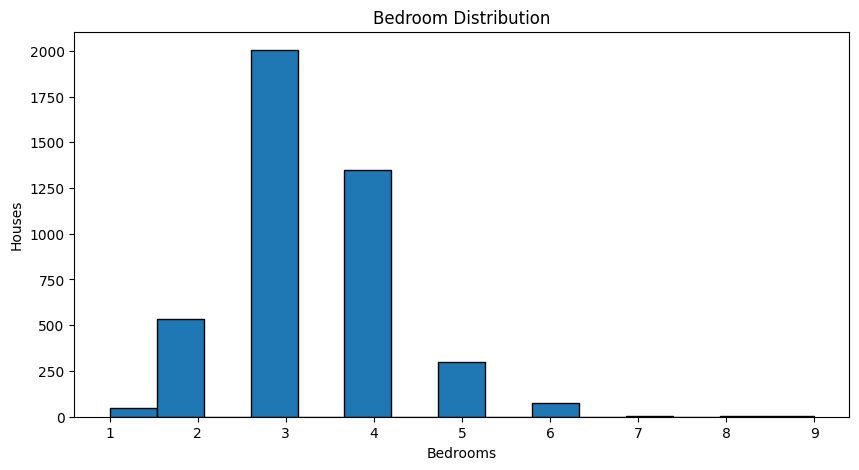

In [237]:
#2. Histogram for distribution of number of bedrooms
plt.figure(figsize=(10, 5))
plt.hist(data['bedrooms'], bins=15, edgecolor='k')
plt.title('Bedroom Distribution')
plt.xlabel('Bedrooms')
plt.ylabel('Houses')
plt.show()

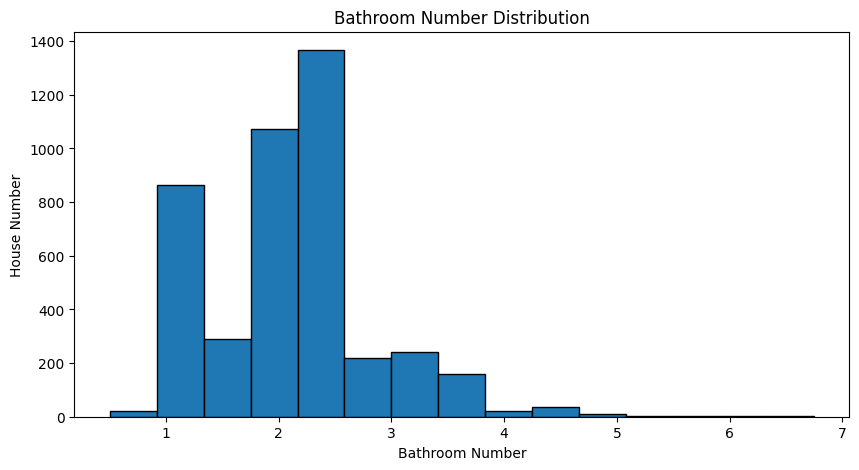

In [238]:
#3. Histogram for the distribution of the number of bathrooms
plt.figure(figsize=(10, 5))
plt.hist(data['bathrooms'], bins=15, edgecolor='k')
plt.title('Bathroom Number Distribution')
plt.xlabel('Bathroom Number')
plt.ylabel('House Number')
plt.show()

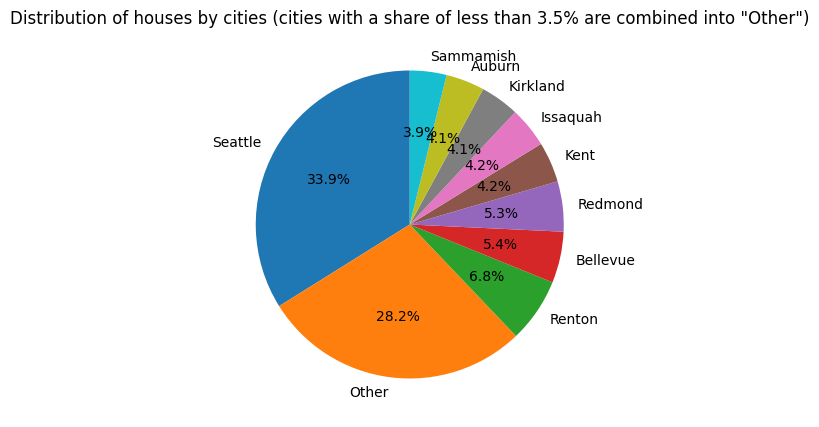

In [239]:
#4. Pie chart for distribution of houses by city
data_for_cities = data.copy()
city_counts = data_for_cities['city'].value_counts()

# Identify cities with a share of less than 3.5%
threshold = 0.035 * city_counts.sum()
cities_to_replace = city_counts[city_counts < threshold].index

# Replace cities with a share less than 3.5% with "Other"
data_for_cities['city'] = data_for_cities['city'].replace(cities_to_replace, 'Other')

# Recalculate the number of houses by city after the merger
city_counts_updated = data_for_cities['city'].value_counts()

# Build a pie chart
plt.figure(figsize=(10, 5))
city_counts_updated.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False)
plt.title('Distribution of houses by cities (cities with a share of less than 3.5% are combined into "Other")')
plt.ylabel('')
plt.show()

# Select any pairs of variables that you think are most important for generating important insights and answering questions about your business problems. Show the relationships between these variables (for presentation ideas, see slide 33 of the lecture notes)

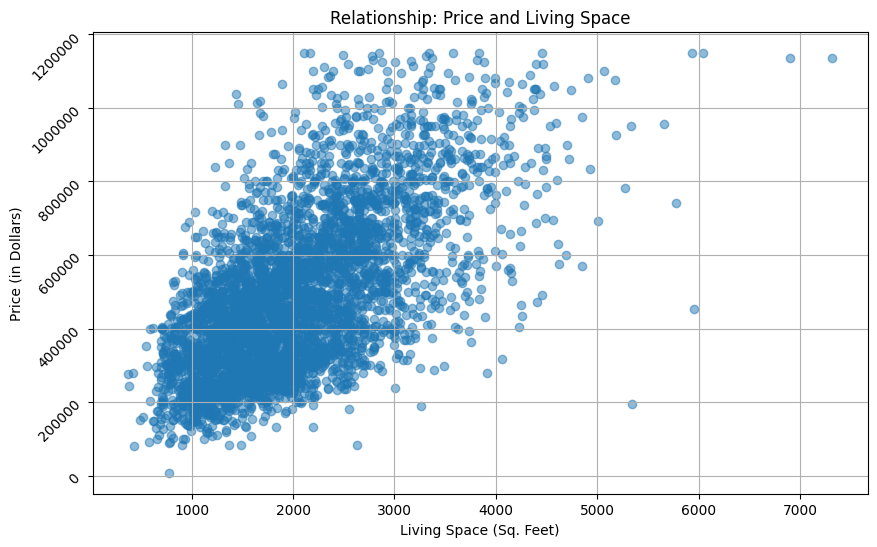

In [240]:
# 1. Relationship: Price and living space
plt.figure(figsize=(10, 6))
plt.scatter(data['sqft_living'], data['price'], alpha=0.5)
plt.title('Relationship: Price and Living Space')
plt.xlabel('Living Space (Sq. Feet)')
plt.ylabel('Price (in Dollars)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(rotation=45)
plt.show()

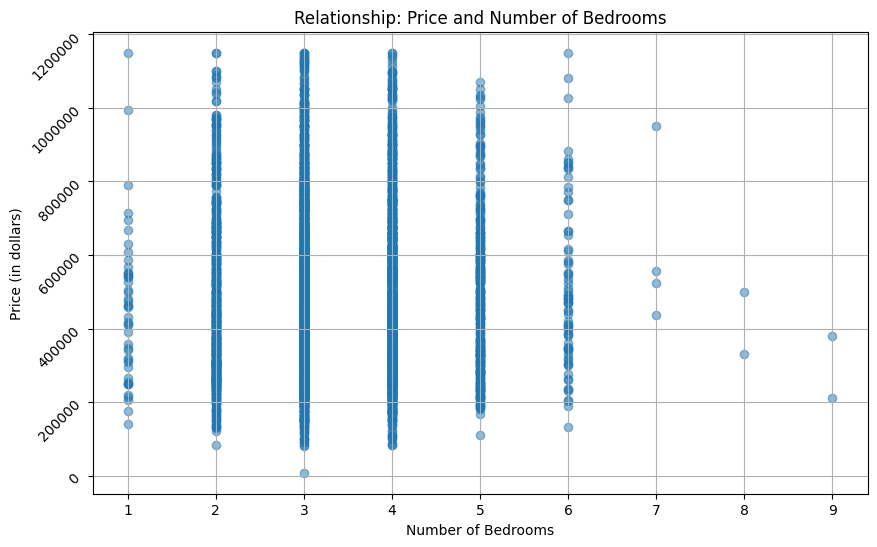

In [241]:
#2. Relationship: Price and Number of Bedrooms
plt.figure(figsize=(10, 6))
plt.scatter(data['bedrooms'], data['price'], alpha=0.5)
plt.title('Relationship: Price and Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in dollars)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(rotation=45)
plt.show()

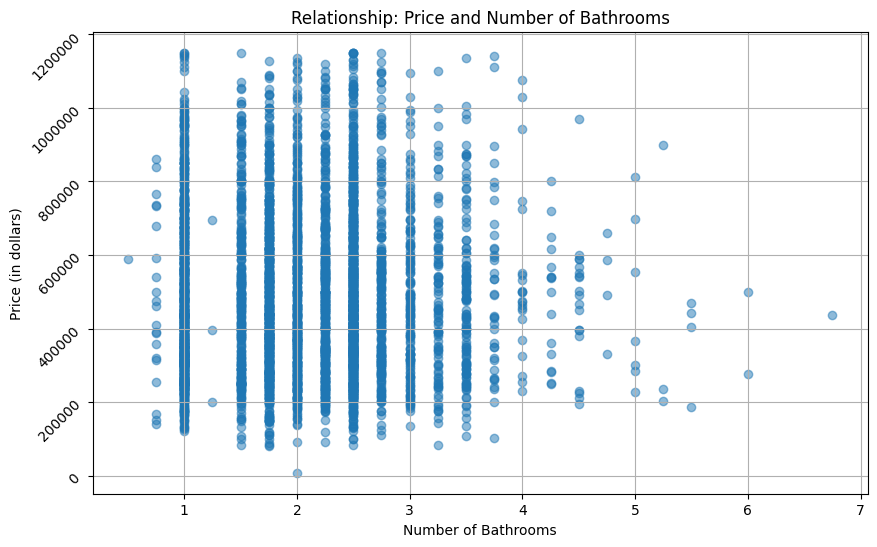

In [242]:
#3. Relationship: Price and Number of Bathrooms
plt.figure(figsize=(10, 6))
plt.scatter(data['bathrooms'], data['price'], alpha=0.5)
plt.title('Relationship: Price and Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in dollars)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(rotation=45)
plt.show()

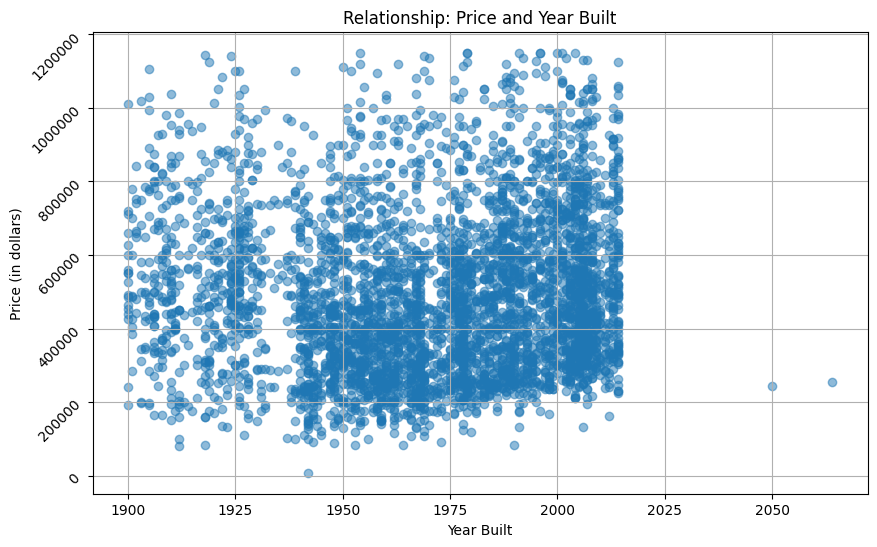

In [243]:
# 4. Relationship: Price and year of construction
plt.figure(figsize=(10, 6))
plt.scatter(data['yr_built'], data['price'], alpha=0.5)
plt.title('Relationship: Price and Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price (in dollars)')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(rotation=45)
plt.show()

# What business insights are provided from the analysis carried out

1. Price and Square Footage (Graph 1)

  There is a positive correlation between the square footage of a home and its price: the larger the square footage, the higher the price. However, after a certain area (approximately 4,000 square feet), increasing the size of the home no longer increases the price significantly.

  This can be used to determine the optimal size of the living space when building a new home to maximize profits.
---
2. Price and Number of Bedrooms (Graph 2)

  The graph shows that the number of bedrooms does not significantly affect the maximum price of a home. Homes with 3-5 bedrooms have a fairly wide range of prices. Rarer options (such as homes with 7-9 bedrooms) are less common and do not necessarily have a higher price.

  When planning a build, you can focus on homes with 3-5 bedrooms, as they are in high demand and provide flexibility in pricing.
---
3. Price and Number of Bathrooms (Graph 3)

  The number of bathrooms also correlates positively with price, but after 4 bathrooms the relationship becomes less noticeable. Most homes have 1 to 3 bathrooms, and this has a significant impact on price.

  To maximize price, it is recommended to take into account the number of bathrooms when building, optimally offering 2-3 bathrooms to increase the market value of the house.
---
4. Price and Year of Construction (Graph 4)

  It is observed that more modern houses (built after 2000) have higher prices, but a significant number of houses built in previous decades also maintain high prices. There is no direct relationship between year of construction and price, but new houses are valued higher on average.

  This suggests that year of construction affects price, but other factors (area, condition, location, etc.) also play an important role. When planning a pricing strategy for new buildings, you can target higher prices, but take into account the overall market situation.

# General Conclusion

Building Optimization: To maximize value, build homes with optimal square footage (up to 4,000 sq. ft.) and 3-5 bedrooms, offering 2-3 bathrooms.

Pricing Strategy: When selling new homes, you can set a higher price based on the trend toward higher prices for modern homes.

Implications: This conclusion is primarily relevant to homes in the Seattle, as one-third of all homes in the dataset are located there.